In [1]:
# importing some of the initially required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# importing the data.
data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [5]:
# seperating the target collumn and attribute columns an dropping the not necessary ones.
y = data.diagnosis
drp = ['id','diagnosis', 'Unnamed: 32']
x= data.drop(drp,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


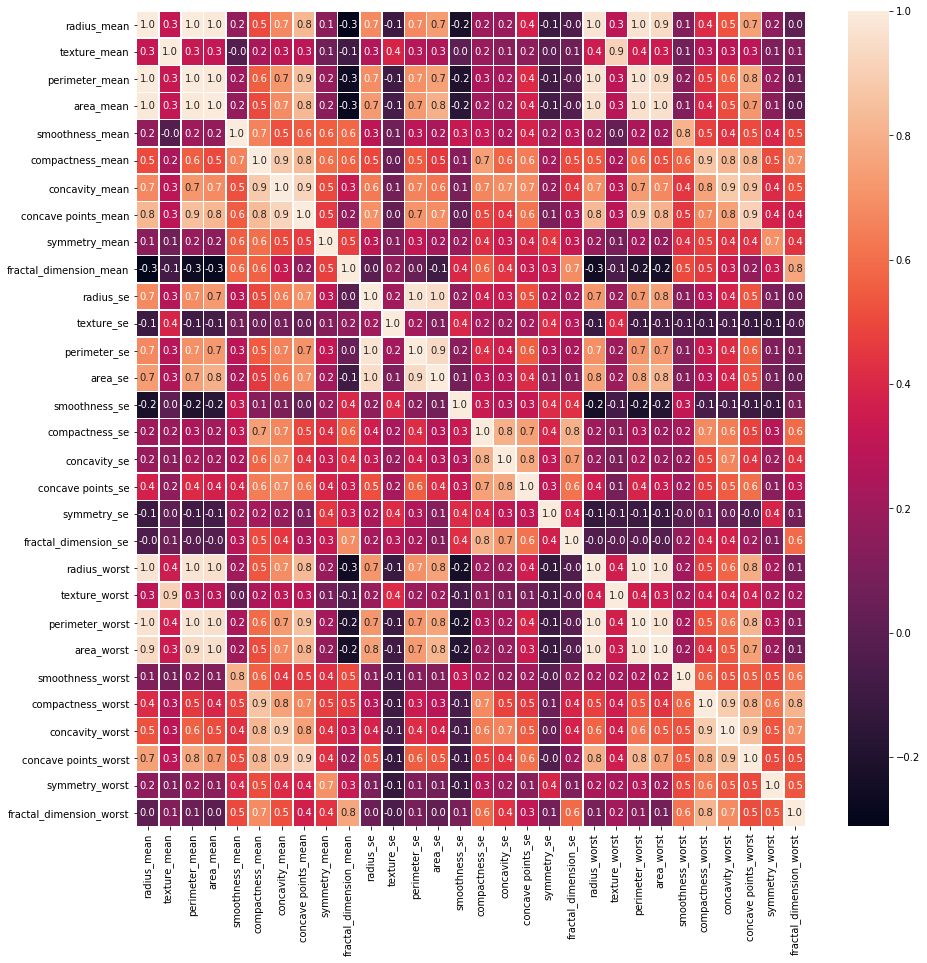

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Observation 
1. As radius_mean, perimeter_mean and area_mean have a correlation of 1 so includinig area_mean is sufficient.
2. Simillar is the case for area_mean and area_worst sso the area_mean will be good.
3. Compactness_mean, concavity_mean and concave points_mean have high correlation so concavity_mean is sufficient.
4. Compactness_worst, concavity_worst and concave points_worst so concavity_worst will do the job.
5. Compactness_se, concavity_se and concave points_se so I use concavity_se.
6.  texture_mean and texture_worst are correlated and I use texture_mean.

In [14]:
drp = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
       'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
       'compactness_se','concave points_se','texture_worst','area_worst']
# making a new x_1 as do not want to make chnages in original dataset just incase.
x_1 = x.drop(drp,axis = 1 )       
print(x_1.shape)
x_1.head()


(569, 16)


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678
